<center><h1> solar demostration </h1></center>

### this ".ipynb" file produces the graphical and numerical results for solar demonstration </font>
### this demostration is not included in the paper </font>
### we set it up for the step-by-step illustration of solar computation </font>

---

## Check the following before running the code

### (a) Read "README.pdf" in this folder first, which introduces the package

### (b) Before replication, delete all .p files in the "./numerical_result" folder. The .p files record the numerical results of the our computation.

### (c) To avoid confusion, reset your kernel before you running the notebook (to clear memory): 
* <font size="4.5"> In Jupyter Notebook/Lab : go to Menu "Kernel" $\rightarrow$ "Restart Kernel and clear all outputs". </font> 

### (d) To evaluate the code for simulation replication in Jupyter Notebook/Lab,
* <font size="4.5"> click : Menu "Kernel" $\rightarrow$ "Restart Kernel and Run All Cells" </font>
* <font size="4.5"> or, select a cell of code, press "shift" and "enter". Run all cells to avoid errors </font>

### (e) Check "joblib", "scikit-learn", "numpy", "matplotlib" and "tqdm" are installed. If not,
* <font size="4.5"> we highly recommend installing Anaconda3 version 2020-11 directly to avoid package management (all packages mentioned above are installed by default).</font>

---

## #1: import all modules

* <font size="4.5"> For simplicity and elegancy, all relevant functions and classes are coded in "solar_simul_demo.py". </font>

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

from solar_simul_demo import one_shot_simul

## make sure we use the Intel MKL C++/Fortran compiler for maximum performance.

In [2]:
import mkl

mkl.get_version_string()

'Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904 for Intel(R) 64 architecture applications'

In [3]:
print('This was obtained using the following Numpy configuration:')

np.show_config()

This was obtained using the following Numpy configuration:
blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/ning/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/Users/ning/anaconda3/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/ning/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/Users/ning/anaconda3/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/ning/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/Users/ning/anaconda3/include']
lapack_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/ning/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/Users/ning/anaconda3/include']
Supported SIMD extensions in this NumPy install:
    

---

## #2(a): define inputs values

| <font size="4.5"> variable name </font> | <font size="4.5">  meaning </font> |
|-|-|
| <font size="4.5">  sample_size  </font> | <font size="4.5">  the sample size $n$ in the paper; </font>| 
| <font size="4.5">  n_dim        </font> | <font size="4.5">  the number of variables(informative + redundant) in $X$, $p$ in the paper; </font>| 
| <font size="4.5">  n_info       </font> | <font size="4.5">  the number of informative variables in $X$; </font>| 
| <font size="4.5">  n_repeat     </font> | <font size="4.5">  the number of subsamples generated by solar; </font>| 
| <font size="4.5">  step_size    </font> | <font size="4.5">  the step size for tuning $c$; </font>| 
| <font size="4.5">  rnd_seed     </font> | <font size="4.5">  the random seed value; </font>| 
| <font size="4.5">  plot_on      </font> | <font size="4.5">  the binary value that controls whether the simulation plots will be saved as PDF; </font>| 

### #2(b): define DGP

* <font size="4.5"> the population regression equation is $$Y = 2\cdot \mathbf{x}_0 + 3\cdot \mathbf{x}_1 + 4\cdot \mathbf{x}_2 + 5\cdot \mathbf{x}_3 + 6\cdot \mathbf{x}_4  + y,$$ 
* <font size="4.5"> To change the simulation settings, simply change the input values. If you change *n_info* you will adjust the DGP as follows: </font>
    * <font size="4.5"> If $i > \mbox{n_info} - 1$ and $i \in \left[ 0, 1, 2, \ldots, p-1 \right]$, $\beta_i = 0$ in population;</font>
    * <font size="4.5"> If $i \leqslant \mbox{n_info} - 1$ and $i \in \left[ 0, 1, 2, \ldots, p-1 \right]$, $\beta_i = i + 2$ in population</font>

In [4]:
sample_size = 200
n_dim       = 100
n_info      = 5
n_repeat    = 10
step_size   = -0.02
rnd_seed    = 0
plot_on     = False

---

## #4: compute solar, CV-lars-lasso (lasso solved by CV-lars) and CV-cd (lasso solved by warm-start cylindrical coordinate descent)

### Numpy, sklearn and python are actively updated. If you use different version, replication results may be slightly different from the paper (see Read_me_first.docx for detail).

In [5]:
#control the random seed for reproduction
np.random.seed(rnd_seed)

### first, we call the class for simulation from "solar_simul_demo.py"

In [6]:
trial = one_shot_simul(sample_size, n_dim, n_info, n_repeat,  step_size, rnd_seed, plot_on)

### then we compute cv-lars-lasso, cv-cd and solar on the simulated data and return the result

In [7]:
solar_coef, opt_c, test_error, Qc_list, la_list, la_vari_list, cd_list, cd_vari_list = trial.simul_func()

---

## #4: plots and results of the simulation

### first, we plot the result of $c$ tuning (via validation error minimization) in algorithm 2

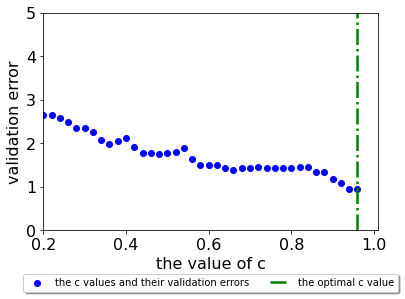

In [8]:
trial.q_plot(test_error, opt_c)

###  then we report the $Q(c) = \left\{ \mathbf{x}_j \; \vert \; \widehat{q}_j \geqslant c \right\}$ under different value of $c$.

In [9]:
trial.q_list(Qc_list)

q_hat value >=  1.0
[['X4']]
q_hat value >=  0.9777777777777777
[['X4'], ['X3', 'X2']]
q_hat value >=  0.9555555555555556
[['X4'], ['X3', 'X2'], ['X1', 'X0']]
q_hat value >=  0.9111111111111111
[['X4'], ['X3', 'X2'], ['X1', 'X0'], ['X19', 'X18']]
q_hat value >=  0.8888888888888888
[['X4'], ['X3', 'X2'], ['X1', 'X0'], ['X19', 'X18'], ['X68']]
q_hat value >=  0.8666666666666667
[['X4'], ['X3', 'X2'], ['X1', 'X0'], ['X19', 'X18'], ['X68'], ['X71', 'X40']]
q_hat value >=  0.8222222222222222
[['X4'], ['X3', 'X2'], ['X1', 'X0'], ['X19', 'X18'], ['X68'], ['X71', 'X40'], ['X37']]
q_hat value >=  0.7777777777777778
[['X4'], ['X3', 'X2'], ['X1', 'X0'], ['X19', 'X18'], ['X68'], ['X71', 'X40'], ['X37'], ['X91']]
q_hat value >=  0.7111111111111111
[['X4'], ['X3', 'X2'], ['X1', 'X0'], ['X19', 'X18'], ['X68'], ['X71', 'X40'], ['X37'], ['X91'], ['X72', 'X35']]
q_hat value >=  0.6888888888888889
[['X4'], ['X3', 'X2'], ['X1', 'X0'], ['X19', 'X18'], ['X68'], ['X71', 'X40'], ['X37'], ['X91'], ['X72', 'X35

### then we report solar regression coefficents

In [10]:
print(solar_coef)

[[1.84462064]
 [2.73659388]
 [4.11540405]
 [5.18360444]
 [6.47553208]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.  

### report $c^*$ of solar
### the reason we print max(opt_c) is because sometimes multiple values of $c$ is assigned with the same value of validation error

In [11]:
print(max(opt_c))

0.96


### and the number of variables selected by cv-lars-lasso

In [12]:
print(la_list)

14


### and the number of variables selected by cv-cd

In [13]:
print(cd_list)

14


### and variables selected by cv-lars-lasso

In [14]:
print('variables selected by cv-lars-lasso: ', [ 'X' + str(i) for i in la_vari_list])

variables selected by cv-lars-lasso:  ['X4', 'X3', 'X2', 'X1', 'X0', 'X71', 'X91', 'X90', 'X17', 'X40', 'X70', 'X65', 'X94', 'X28']


### and variables selected by cv-cd

In [15]:
print('variables selected by cv-cd: ', [ 'X' + str(i) for i in cd_vari_list])

variables selected by cv-cd:  ['X0', 'X1', 'X2', 'X3', 'X4', 'X17', 'X28', 'X40', 'X65', 'X70', 'X71', 'X90', 'X91', 'X94']


### Finally we produce the HTML file

In [1]:
!rm -rf solar_demo.html
!jupyter nbconvert --to html solar_demo.ipynb

[NbConvertApp] Converting notebook solar_demo.ipynb to html
[NbConvertApp] Writing 655432 bytes to solar_demo.html
